In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
Ca0 = 2     # Entering concentration
vo = 2      # volumetric flow rate
volume = 20 # total volume of reactor, spacetime = 10
k = 1       # reaction rate constant

N = 100     # number of points to discretize the reactor volume on

init = np.zeros(N)    # Concentration in reactor at t = 0
init[0] = Ca0         # concentration at entrance

V = np.linspace(0, volume, N) # discretized volume elements
tspan = np.linspace(0, 25)    # time span to integrate over

def method_of_lines(C, t):
    'coupled ODES at each node point'
    D = -vo * np.diff(C) / np.diff(V) - k * C[1:]**2
    return np.concatenate([[0], #C0 is constant at entrance
                            D])

sol = odeint(method_of_lines, init, tspan)

# steady state solution
def pfr(C, V):
    return 1.0 / vo * (-k * C**2)

ssol = odeint(pfr, Ca0, V)

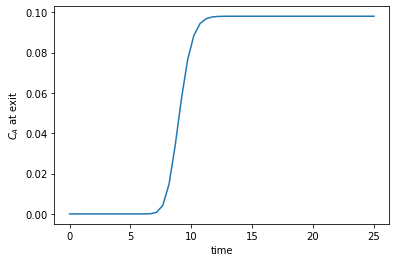

In [3]:

plt.plot(tspan, sol[:, -1])
plt.xlabel('time')
plt.ylabel('$C_A$ at exit')
plt.savefig('transient-pfr-1.png')